# Decision Trees and Random Foressts

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 

Column | information
-------------------|-------------------
survival | Survival (0 = No; 1 = Yes)
class | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name | Name
sex | Sex
age | Age
sibsp | Number of Siblings/Spouses Aboard
parch | Number of Parents/Children Aboard
ticket | Ticket Number
fare | Passenger Fare
cabin | Cabin
embarked | Port of Embarkation <br> (C = Cherbourg; Q = Queenstown; S = Southampton)
boat | Lifeboat (if survived)
body | Body number (if did not survive and body was recovered)

In [2]:
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')

In [3]:
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [5]:
train['Embarked'].value_counts(dropna=False)


S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [6]:
train['Embarked']=train['Embarked'].fillna(value = 'S')

In [7]:
train= train.drop('Cabin', axis=1)
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [8]:
train[train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [9]:
mean_age = round(train['Age'].mean())
mean_age


30

In [10]:
train['Age'] = train['Age'].fillna(value=mean_age)

In [11]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
train_num = train.select_dtypes(np.number)
train_cat = train.select_dtypes(object)

In [13]:
train_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [14]:
train_cat.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [15]:
train_cat.Name.value_counts()

Turja, Miss. Anna Sofia          1
Emanuel, Miss. Virginia Ethel    1
Walker, Mr. William Anderson     1
Cacic, Miss. Marija              1
Cherry, Miss. Gladys             1
                                ..
Heininen, Miss. Wendla Maria     1
Windelov, Mr. Einar              1
Laleff, Mr. Kristo               1
Albimona, Mr. Nassef Cassem      1
Chronopoulos, Mr. Apostolos      1
Name: Name, Length: 891, dtype: int64

In [16]:
train_cat.Ticket.value_counts()

CA. 2343      7
347082        7
1601          7
CA 2144       6
3101295       6
             ..
17464         1
14312         1
330931        1
A/5. 13032    1
349216        1
Name: Ticket, Length: 681, dtype: int64

### Too many unique names and ticket numbers.  Drop columns

In [17]:
train_cat = train_cat.drop(columns=['Name','Ticket'], axis=1)

In [18]:
train_cat.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [19]:
encoder = OneHotEncoder(drop='first').fit(train_cat)

cols = encoder.get_feature_names(input_features=train_cat.columns)

train_cat_encode = pd.DataFrame(encoder.transform(train_cat).toarray(),columns=cols)

train_cat_encode.head()


<IPython.core.display.Javascript object>

,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,1.0


In [20]:
train_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


## Put numerical and categorical back together

In [21]:
train = pd.concat([train_num,train_cat_encode],axis = 1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [23]:
feature_cols = ['Pclass','Age','SibSp','Parch','Fare','Sex_male','Embarked_Q','Embarked_S']

In [24]:
X = train[feature_cols]
y = train['Survived']

### Train / Test / Split

In [25]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=.2,random_state = 73)

## Set up the decision tree model

In [26]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


### Model Accuracy, how often is the classifier correct?

In [27]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7821229050279329


# Let's take a look at the tree itself!

####   Code found at     https://www.datacamp.com/community/tutorials/decision-tree-classification-python

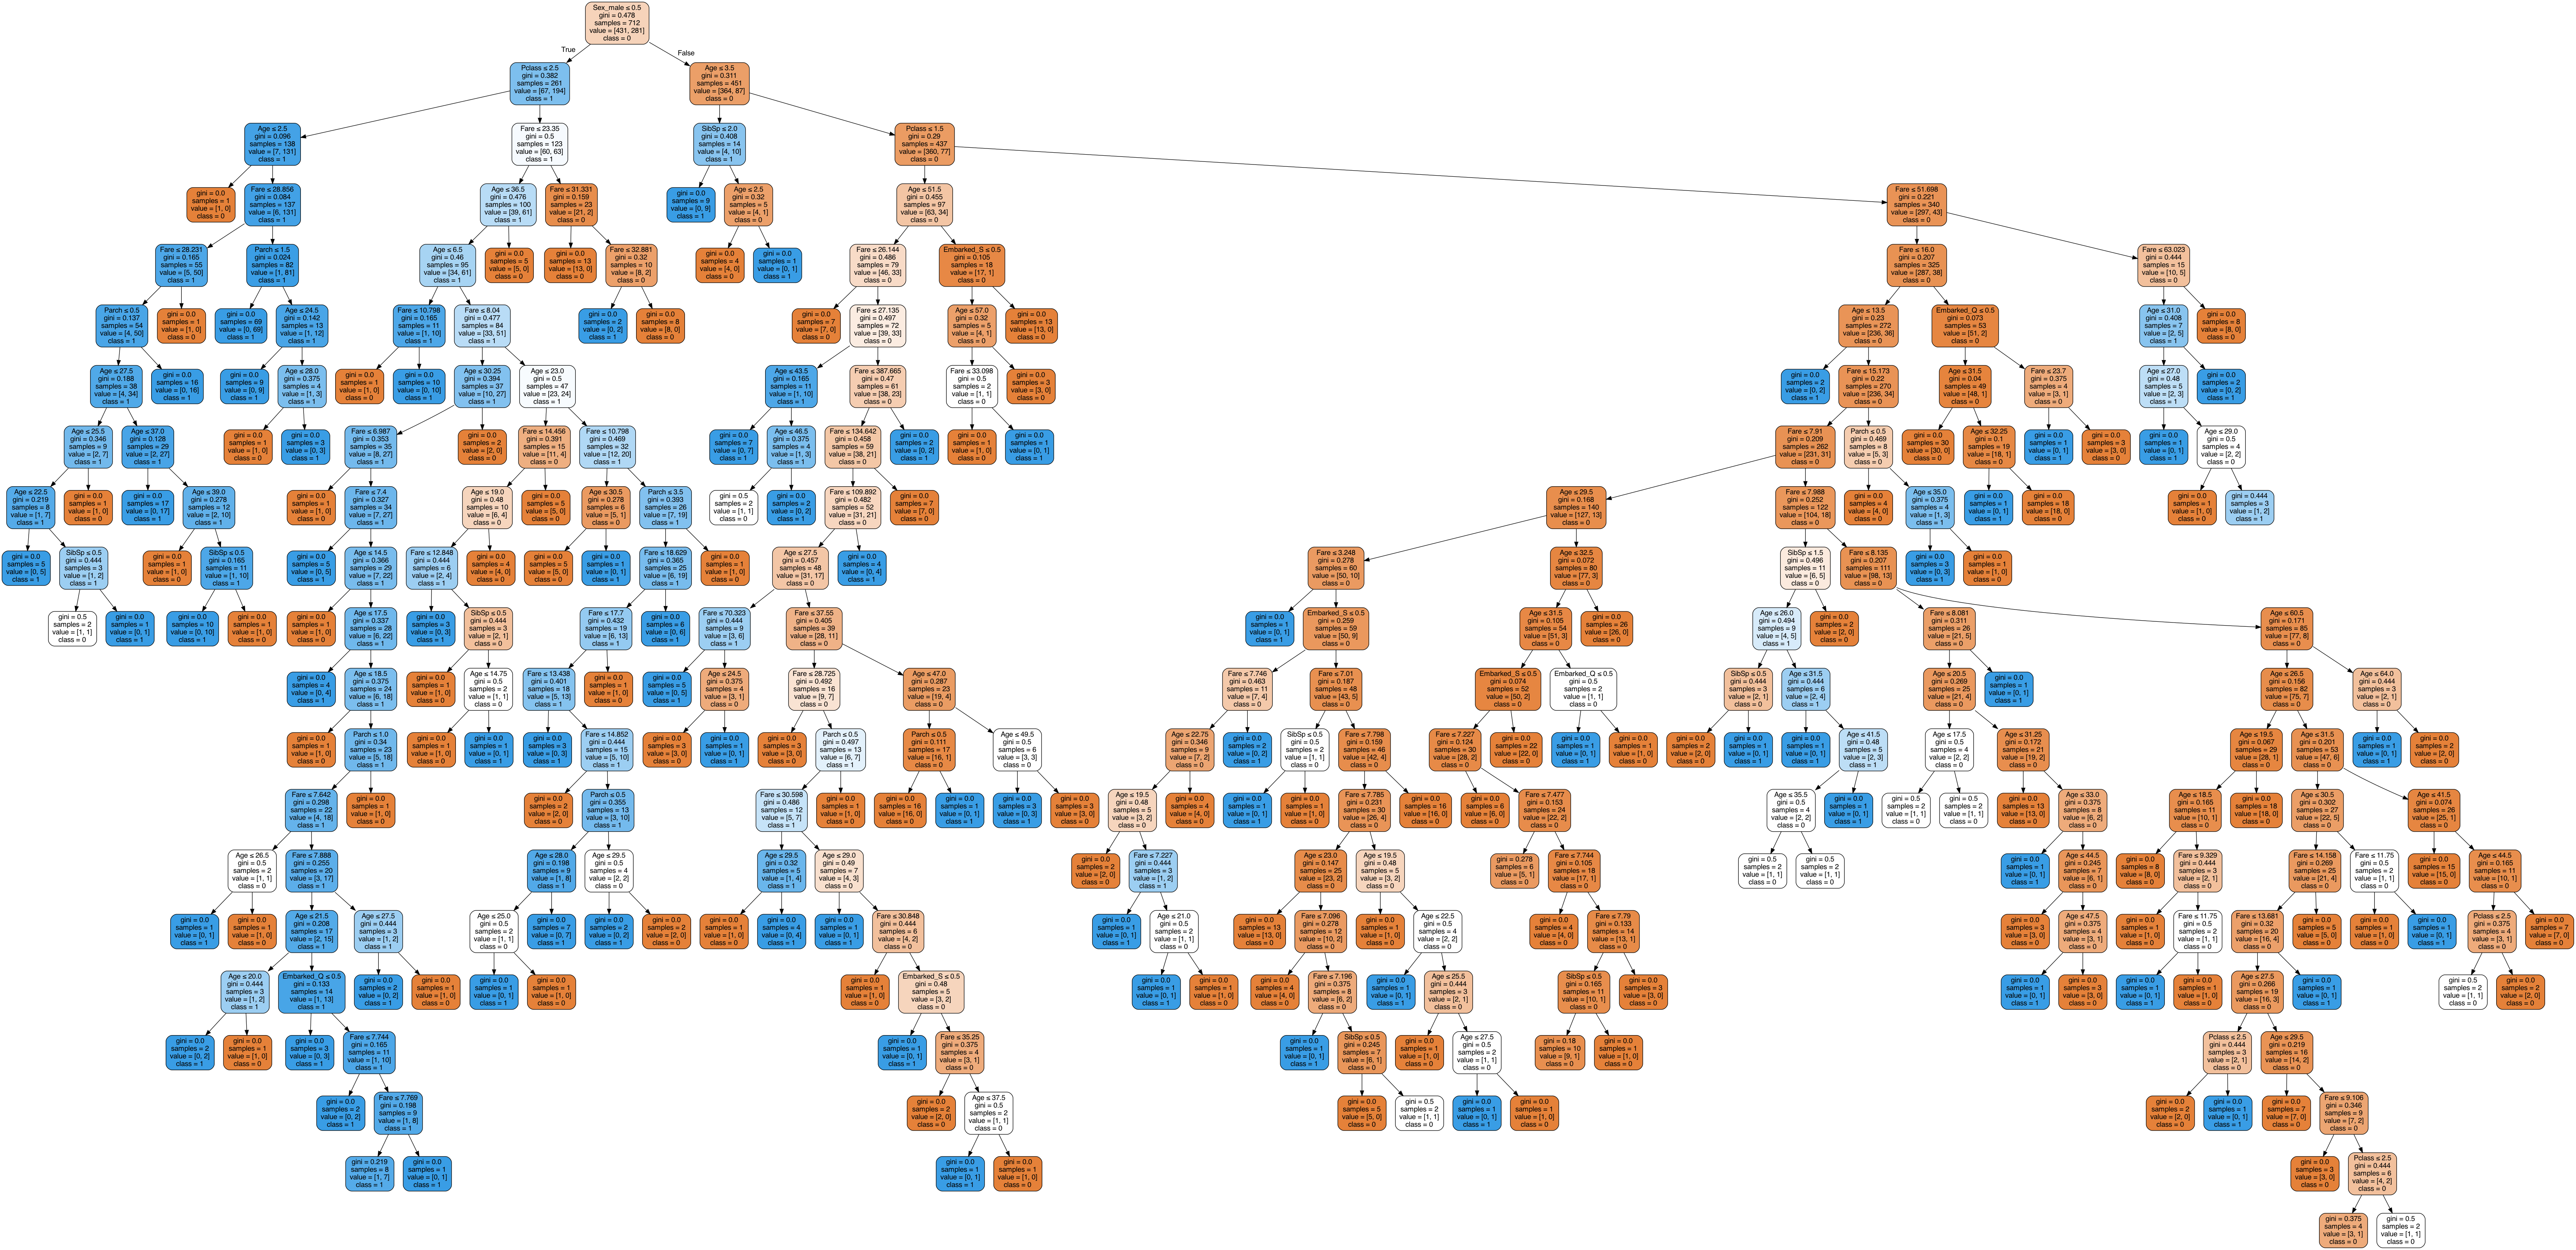

In [28]:
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus
from six import StringIO

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Titanic.png')
Image(graph.create_png())


## Let's try to improve the model

In [29]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8268156424581006


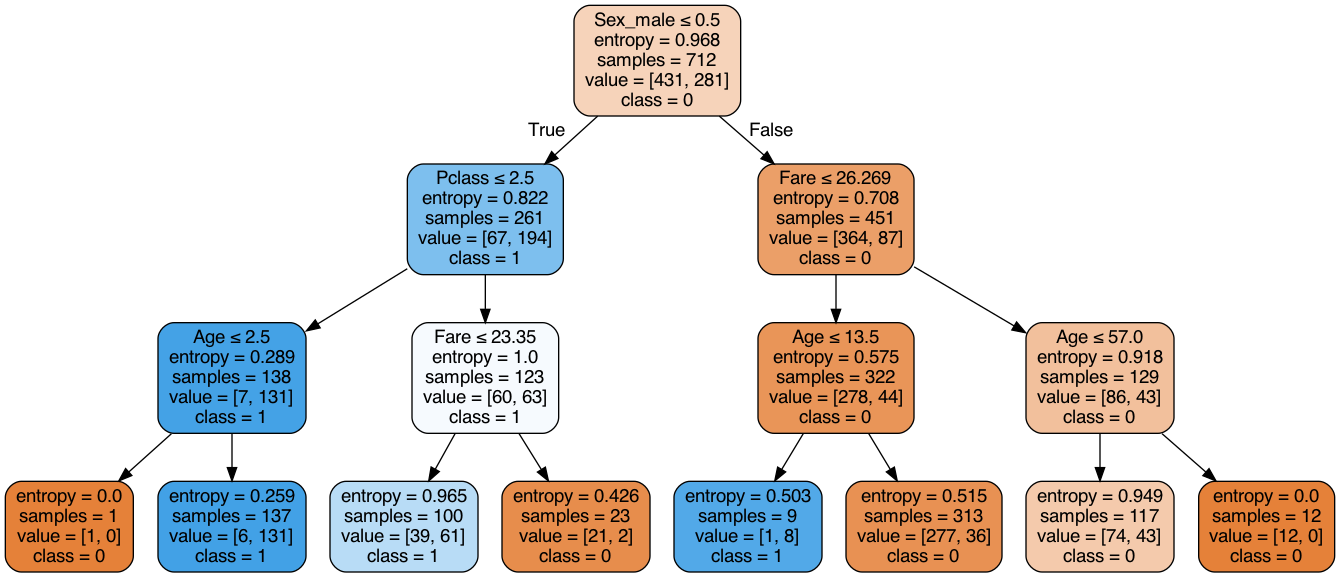

In [30]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Titanic.png')
Image(graph.create_png())

## Can we predict from our unseen test data?

In [31]:
test.head()
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [32]:
test['Age'] = test['Age'].fillna(value=mean_age)

In [33]:
test_num = test.select_dtypes(np.number)
test_cat = test.select_dtypes(object)

In [34]:
test_num.shape

(418, 6)

In [35]:
test_cat.shape

(418, 5)

In [36]:
test_cat.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,NaN,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S
2,"Myles, Mr. Thomas Francis",male,240276,NaN,Q
3,"Wirz, Mr. Albert",male,315154,NaN,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,NaN,S


In [37]:
test_cat = test_cat.drop(columns=['Name','Ticket','Cabin'], axis=1)

In [38]:
test_cat

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S
...,...,...
413,male,S
414,female,C
415,male,S
416,male,S


In [39]:
cols = encoder.get_feature_names(input_features=test_cat.columns)

test_cat_encode = pd.DataFrame(encoder.transform(test_cat).toarray(),columns=cols)

test_cat_encode.head()

,Sex_male,Embarked_Q,Embarked_S
0,1.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,1.0,0.0
3,1.0,0.0,1.0
4,0.0,0.0,1.0


In [40]:
test_cat.shape

(418, 2)

In [41]:
test_num.shape

(418, 6)

In [42]:
test_num= test_num.drop('PassengerId',axis=1)

In [43]:
test_num.shape

(418, 5)

In [44]:
test2 = pd.concat([test_num,test_cat_encode],axis = 1)

In [45]:
test2.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          1
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [46]:
test2 = test2.dropna()
test2

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1.0,1.0,0.0
1,3,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,1.0,1.0,0.0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,1.0,0.0,1.0
414,1,39.0,0,0,108.9000,0.0,0.0,0.0
415,3,38.5,0,0,7.2500,1.0,0.0,1.0
416,3,30.0,0,0,8.0500,1.0,0.0,1.0


In [47]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [48]:
test=test.drop(['Cabin'],axis=1)

In [49]:
test=test.dropna()

In [50]:
new_pred = clf.predict(test2)
#feature_cols

In [51]:
new_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
test['Survived']=new_pred

In [52]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [53]:
test = test.drop(['PassengerId','Ticket'], axis=1)
test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,30.0,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,30.0,0,0,8.0500,S


In [54]:
full_titanic = pd.read_excel('titanic3.xls')

In [55]:
full_titanic


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [56]:
#Df1.name.isin(Df2.IDs).astype(int)
test.Name.isin(full_titanic.name).value_counts()

True     395
False     22
Name: Name, dtype: int64

In [57]:
both_df = test[test.Name.isin(full_titanic.name)]
both_df.columns

cols = []
for i in range(len(both_df.columns)):
    cols.append(both_df.columns[i].lower())

both_df.columns = cols
both_df


,pclass,name,sex,age,sibsp,parch,fare,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,30.0,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,30.0,0,0,8.0500,S


In [58]:
cols1= both_df.columns
cols1

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

In [59]:
df_both =  full_titanic[full_titanic.name.isin(test.Name)]
df_both.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [60]:
df_both = df_both.drop(['ticket','cabin','boat','body','home.dest'], axis=1)
df_both

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,151.5500,S
10,1,0,"Astor, Col. John Jacob",male,47.0,1,0,227.5250,C
19,1,0,"Beattie, Mr. Thomson",male,36.0,0,0,75.2417,C
24,1,1,"Bird, Miss. Ellen",female,29.0,0,0,221.7792,S
25,1,0,"Birnbaum, Mr. Jakob",male,25.0,0,0,26.0000,C
...,...,...,...,...,...,...,...,...,...
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
1296,3,0,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
1298,3,0,"Wittevrongel, Mr. Camille",male,36.0,0,0,9.5000,S
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,7.2250,C


In [61]:
#df_both= df_both[[cols1]]
df_both.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [62]:
cols1

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

In [63]:
df_both = df_both.reindex(columns=cols1)
df_both

,pclass,name,sex,age,sibsp,parch,fare,embarked
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,151.5500,S
10,1,"Astor, Col. John Jacob",male,47.0,1,0,227.5250,C
19,1,"Beattie, Mr. Thomson",male,36.0,0,0,75.2417,C
24,1,"Bird, Miss. Ellen",female,29.0,0,0,221.7792,S
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,26.0000,C
...,...,...,...,...,...,...,...,...
1290,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
1296,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
1298,3,"Wittevrongel, Mr. Camille",male,36.0,0,0,9.5000,S
1306,3,"Zakarian, Mr. Mapriededer",male,26.5,0,0,7.2250,C


In [64]:
together =pd.concat([ df_both,both_df], axis = 0)
together

,pclass,name,sex,age,sibsp,parch,fare,embarked
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,151.5500,S
10,1,"Astor, Col. John Jacob",male,47.0,1,0,227.5250,C
19,1,"Beattie, Mr. Thomson",male,36.0,0,0,75.2417,C
24,1,"Bird, Miss. Ellen",female,29.0,0,0,221.7792,S
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,26.0000,C
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,30.0,0,0,8.0500,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,3,"Ware, Mr. Frederick",male,30.0,0,0,8.0500,S


In [65]:
duplicateRowsDF = together[together.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF


Duplicate Rows except first occurrence based on all columns are :


,pclass,name,sex,age,sibsp,parch,fare,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
409,3,"Peacock, Miss. Treasteall",female,3.0,1,1,13.7750,S
411,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,90.0000,Q
412,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,7.7750,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C


In [66]:
314/417

0.7529976019184652